In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Clustering/Absenteeism_at_work.csv')

In [4]:
df=data.drop('Unnamed: 0',axis=1)
df.head()

,Individual_identification,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [5]:
df.describe()

,Individual_identification,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Individual_identification        740 non-null    int64
 1   Reason_for_absence               740 non-null    int64
 2   Month_of_absence                 740 non-null    int64
 3    Day_of_the_week                 740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation_expense           740 non-null    int64
 6   Distance_from_Residence_to_Work  740 non-null    int64
 7   Service_time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9    Work_load_Average               740 non-null    int64
 10  Hit_target                       740 non-null    int64
 11  Disciplinary_failure             740 non-null    int64
 12  Education                        740 non-null    i

In [7]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Individual_identification,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,0.000046,0.000109,0.000029,0.000013,0.000004,0.001206,0.000150,0.000054,0.000138,0.999999,...,0.000000,0.000004,0.000008,0.000004,0.000000,0.000004,0.000376,0.000718,0.000125,0.000017
1,0.000150,0.000000,0.000029,0.000013,0.000004,0.000493,0.000054,0.000075,0.000209,0.999999,...,0.000004,0.000004,0.000004,0.000004,0.000000,0.000000,0.000409,0.000743,0.000129,0.000000
2,0.000013,0.000096,0.000029,0.000017,0.000004,0.000747,0.000213,0.000075,0.000159,0.999999,...,0.000000,0.000004,0.000000,0.000004,0.000000,0.000000,0.000372,0.000710,0.000129,0.000008
3,0.000029,0.000029,0.000029,0.000021,0.000004,0.001165,0.000021,0.000058,0.000163,0.999999,...,0.000000,0.000004,0.000008,0.000004,0.000004,0.000000,0.000284,0.000701,0.000100,0.000017
4,0.000046,0.000096,0.000029,0.000021,0.000004,0.001206,0.000150,0.000054,0.000138,0.999999,...,0.000000,0.000004,0.000008,0.000004,0.000000,0.000004,0.000376,0.000718,0.000125,0.000008


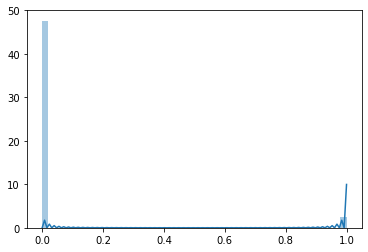

In [8]:
sns.distplot(data_scaled)

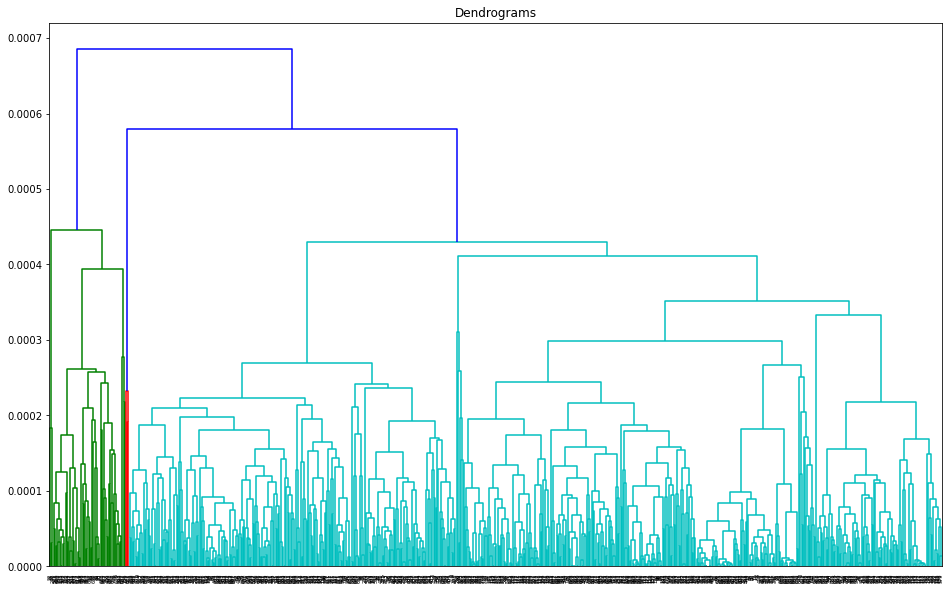

In [9]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='average'))

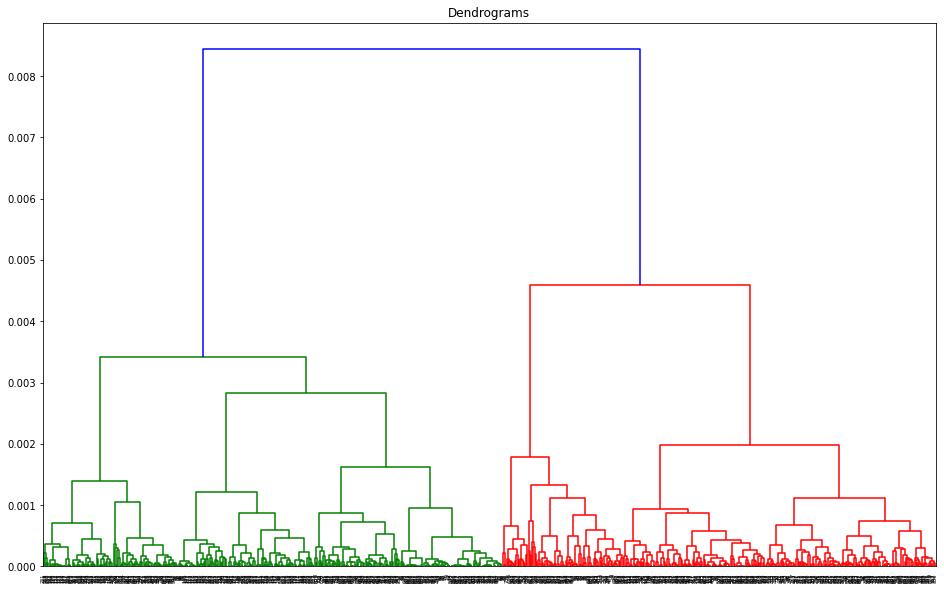

In [10]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

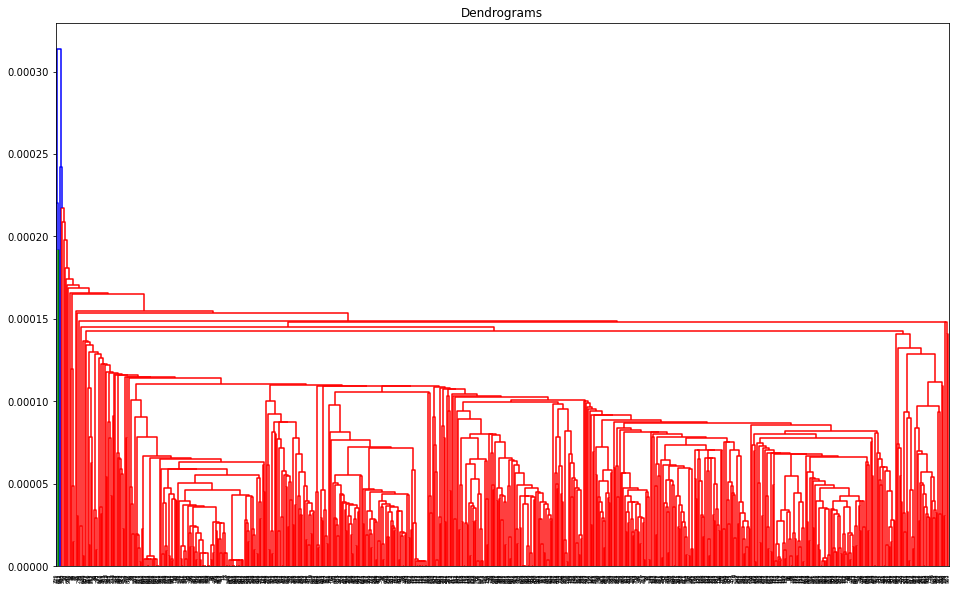

In [11]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='single'))

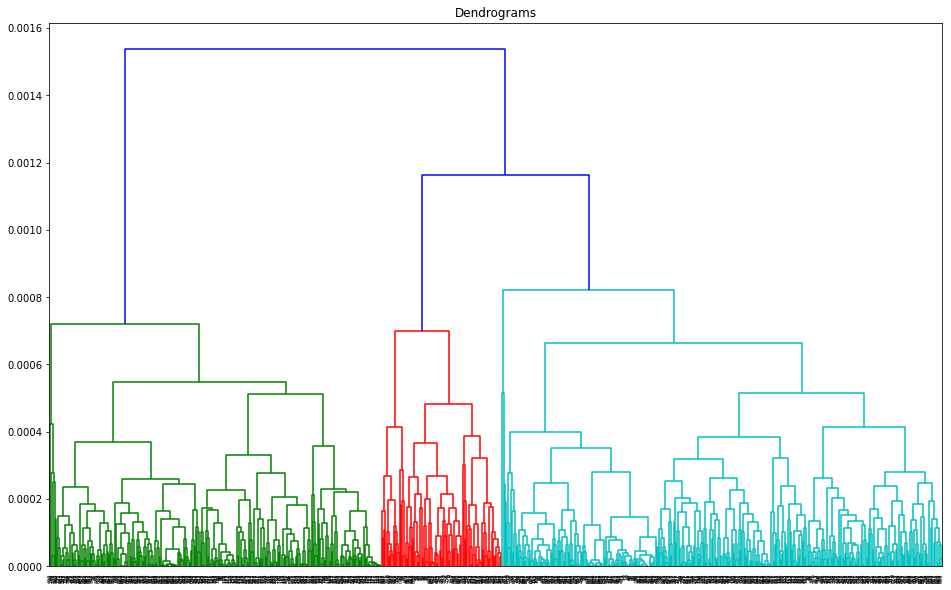

In [12]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')  
cluster

AgglomerativeClustering()

In [14]:
cluster = AgglomerativeClustering(affinity='manhattan', linkage='average')  
cluster

AgglomerativeClustering(affinity='manhattan', linkage='average')

In [15]:
cluster = AgglomerativeClustering(affinity='chebyshev', linkage='single')  
cluster

AgglomerativeClustering(affinity='chebyshev', linkage='single')

In [16]:
cluster = AgglomerativeClustering(affinity='seuclidean', linkage='complete')  
cluster

AgglomerativeClustering(affinity='seuclidean', linkage='complete')